# Obtimizar el resultado obtenido de geneticos con la metaheuristica Recosido simulado.

In [ ]:
import math
import random as rn
import numpy as np
import sys
import time
import matplotlib.pyplot as plt

***Funcion costo***

In [2]:
def Costo(probabilidad,sol,D):
  new=[]
  for i in sol:
    new.append(probabilidad[i])
  suma=sum(map(lambda x, y: x * y, new,D))  
  return suma

***Crear nuevo vecino***

In [ ]:
def nuevoVecino(solucion):
  numeroAleatorio1=np.random.randint(0, len(solucion)) #crear un numero aleatorio entre 0 y N
  while True:
    aleatorio = np.random.randint(0, len(solucion))
    if numeroAleatorio1 != aleatorio:
      break
  i, j = min(aleatorio, numeroAleatorio1), max(aleatorio, numeroAleatorio1)
  scand = solucion.copy()
  while i < j:
    scand[i], scand[j] = scand[j], scand[i]
    i += 1
    j -= 1
  return scand

In [ ]:
def unico(x,L,z):
  esUnico=True
  for i in range(len(L)):
    if x==L[i]:
      esUnico=False
      break
  return esUnico
def arrayRandom(n):
  L=[]
  j=1
  while j<n:
    x=int(rn.uniform(1,n))
    if unico(x,L,10):
      L.append(x)
      j+=1
  return L  


***Metaheuristica Recocido simulado***

In [ ]:

def recocido(sAct,T,L,alpha,R,band):
  inicio = time.time()
  ciclo=0
  Tiempos = [0]
  costos = []
  Temperaturas = []
  Ciclos = [0]
  iteracion    = 0
  iteraciones = [0]
  Temperaturas.append(T)
  tiempoTotal = 0
  arregloP = [0.1315,0.0165,0.0414,0.0470,0.1345,0.0069,0.0104,0.0100,0.0665,0.0049,0.0004,0.0555,0.0285,0.0686,0.0018,0.0902,
            0.0254,0.0123,0.0654,0.0712,0.0411,0.0445,0.0104,0.0001,0.0016,0.0092,0.0042]
  arregloD =[0.14,0.13,0.12,0.11,0.12,0.12,0.11,0.12,0.13,0.14,0.13,0.12,0.11,0.10,0.11,0.11,0.10,0.11,0.12,0.13,0.14,0.13,0.12,0.11,0.12,0.12,0.11]
  costos.append(Costo(arregloP,sAct,arregloD))

  while T > 0.000001 and costos[len(costos)-1]>0:
    ciclo=ciclo+1
    ini_t = time.time() ## variable tiempo iniciail
    for i in range(L):
        sCand = nuevoVecino(sAct)
        
        costoCandidato = Costo(arregloP,sCand,arregloD)#Costo(sCand)
        AE=Costo(arregloP,sAct,arregloD) - costoCandidato
      
        if tiempoTotal>1:
          break
        if AE >= 0:
            sAct = sCand
        else:
            proba= pow(math.e,-(-AE/(k*T)))
            if proba > R:
                sAct = sCand
                 
    fin_t = time.time()
    Tiempos.append(fin_t - ini_t)
    T=alpha*T
    costos.append(Costo(arregloP,sAct,arregloD))
    Ciclos.append(ciclo)
    Temperaturas.append(T)
  if(band == True):
    fig, ax = plt.subplots()
    ax.plot(Ciclos, costos)
    ax.set_xlabel("Iteraciones")
    ax.set_ylabel("Solucion encontrada-costo")
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(Ciclos, Tiempos)
    ax.set_xlabel("Iteraciones")
    ax.set_ylabel("Tiempo")
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(Ciclos, Temperaturas)
    ax.set_xlabel("Iteraciones")
    ax.set_ylabel("Temperatura")
    plt.show()
  return sAct

#PRUEBA

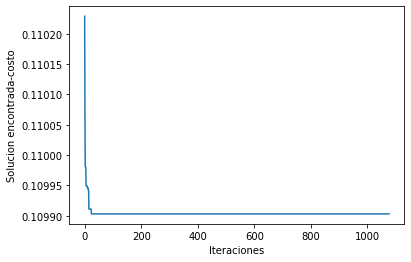

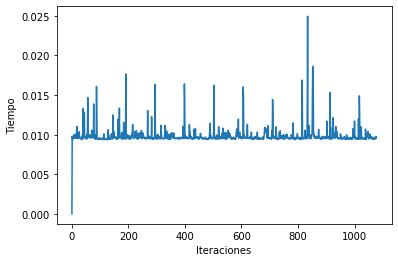

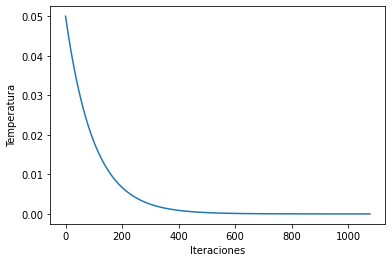

[10, 5, 17, 18, 7, 12, 11, 6, 25, 24, 26, 20, 15, 4, 19, 8, 0, 13, 22, 14, 23, 9, 16, 21, 1, 2, 3]
Costo:  0.10990299999999996
Tiempo tomado en segundo:  11.063138723373413
solucion 
   k   f   q   r   h   m   l   g   y   x
      z   t   o   e   s   i   a   n   v   ñ
       w   j   p   u   b   c   d


In [ ]:
T=0.05
L=500
alpha=.99
R=0.6
k=1.380649*pow(10,-23)
N = 27 #Numer de teclas

SolucionInicial = [10, 24, 17, 11, 21, 1, 19, 3, 7, 14, 6, 5, 13, 0, 15, 20, 4, 12, 2, 22, 23, 9, 25, 18, 16, 26, 8]
arregloP = [0.1315,0.0165,0.0414,0.0470,0.1345,0.0069,0.0104,0.0100,0.0665,0.0049,0.0004,0.0555,0.0285,0.0686,0.0018,0.0902,
          0.0254,0.0123,0.0654,0.0712,0.0411,0.0445,0.0104,0.0001,0.0016,0.0092,0.0042]
arregloD =[0.14,0.13,0.12,0.11,0.12,0.12,0.11,0.12,0.13,0.14,0.13,0.12,0.11,0.10,0.11,0.11,0.10,0.11,0.12,0.13,0.14,0.13,0.12,0.11,0.12,0.12,0.11]
tiempoInicial = time.time()
MejorsolucionEncontrada=recocido(SolucionInicial,T,L,alpha,R,True)
tiempoFinal = time.time()
print(MejorsolucionEncontrada)
print("Costo: ",Costo(arregloP,MejorsolucionEncontrada,arregloD))
print("Tiempo tomado en segundo: ",tiempoFinal-tiempoInicial)

primeraLinea=""
segundaLinea=""
terceraLinea=""

letras="abcdefghijklmnñopqrstuvwxyz"
n=0
for i in MejorsolucionEncontrada:
  if n <10:
    primeraLinea+=(" "*3)+letras[i]
  
  elif n <20:
    segundaLinea+=(" "*3)+letras[i]
  elif n <27:
    terceraLinea+=(" "*3)+letras[i]
  n+=1
print("solucion ")
print(primeraLinea)
print(" "*2,segundaLinea)
print(" "*3,terceraLinea)

In [5]:
#prueba paara el costo de la distribucion qwerty
solucion = "qwertyuiopasdfghjklñzxcvbnm"
letras="abcdefghijklmnñopqrstuvwxyz"
sol=[]
for i in solucion:
  sol.append(letras.find(i))
arregloP = [0.1315,0.0165,0.0414,0.0470,0.1345,0.0069,0.0104,0.0100,0.0665,0.0049,0.0004,0.0555,0.0285,0.0686,0.0018,0.0902,
          0.0254,0.0123,0.0654,0.0712,0.0411,0.0445,0.0104,0.0001,0.0016,0.0092,0.0042]
arregloD =[0.14,0.13,0.12,0.11,0.12,0.12,0.11,0.12,0.13,0.14,0.13,0.12,0.11,0.10,0.11,0.11,0.10,0.11,0.12,0.13,0.14,0.13,0.12,0.11,0.12,0.12,0.11]

print("Costo: ",Costo(arregloP,sol,arregloD))

primeraLinea=""
segundaLinea=""
terceraLinea=""

letras="abcdefghijklmnñopqrstuvwxyz"
n=0
for i in solucion:
  if n <10:
    primeraLinea+=(" "*3)+i
  
  elif n <20:
    segundaLinea+=(" "*3)+i
  elif n <27:
    terceraLinea+=(" "*3)+i
  n+=1
print("solucion ")
print(primeraLinea)
print(" "*2,segundaLinea)
print(" "*3,terceraLinea)


Costo:  0.12068800000000002
solucion 
   q   w   e   r   t   y   u   i   o   p
      a   s   d   f   g   h   j   k   l   ñ
       z   x   c   v   b   n   m
